## Week 2 Part One Assignment:Graph Visualization

Vanita Thompson

#### Loading libraries

In [45]:
from collections import Counter 
import itertools
import copy
import pandas as pd
import networkx as nx
from networkx import algorithms
import matplotlib.pyplot as plt
import os

### Importing Data

### 1. Load a graph database of your choosing from a text file or other source. If you take a large network dataset from the web (such as from https://snap.stanford.edu/data/), please feel free at this point to load just a small subset of the nodes and edges.

In [3]:
%matplotlib inline

#load dataset
data = pd.read_csv('https://raw.githubusercontent.com/Vthomps000/DATA620/master/D-DoPathways_diseaseclasses.csv')
data.head()

,Disease ID,Disease Name,Disease Class
0,C0023903,Liver neoplasms,cancer
1,C0018798,Congenital Heart Defects,cardiovascular system disease
2,C0027051,Myocardial Infarction,cardiovascular system disease
3,C0028754,Obesity,acquired metabolic disease
4,C0005138,Berylliosis,respiratory system disease


The dataset used is provided by Stanford (https://snap.stanford.edu/biodata/datasets/10005/10005-D-DoPathways.html). The dataset provides a mapping of diseases to disease categories. Disease categories represent disease classes defined based on disease etiology and location in the human body.

#### Citations

1. Large-scale analysis of disease pathways in the human interactome. Monica Agrawal, Marinka Zitnik, and Jure Leskovec. Pacific    Symposium on Biocomputing. 2018.

2. Disease Ontology 2015 update: an expanded and updated database of human diseases for linking biomedical knowledge through        disease data. Kibbe, Warren A., et al. Nucleic Acids Research. 2014.

### 2. Create basic analysis on the graph, including the graph’s diameter, and at least one other metric of your choosing. You may either code the functions by hand (to build your intuition and insight), or use functions in an existing package. 

In [5]:
#create a graph
graph = nx.from_pandas_edgelist(data, 'Disease Name', 'Disease Class')

In [50]:
#calculate diameter
nx.diameter(graph)

NetworkXError: Found infinite path length because the graph is not connected

In [51]:
#double check if graph is connected
nx.is_connected(graph)

False

After running the built-in function to calculate the diameter of the graph and resulting in an error, the built-in is_connected function tells us that the graph is in fact not connected. This means that we cannot calculate the diameter.

In [6]:
nx.number_of_nodes(graph)

330

In [7]:
#number of edges
nx.number_of_edges(graph)

300

C:\Users\thomp\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:518: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\thomp\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:565: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


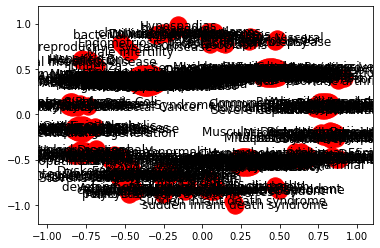

In [8]:
#draw the graph 
nx.draw_networkx(graph)

In [15]:
plt.show()

The previous error shows  the graph is not connected. The number of groups aren't apparent, it may be possible if we can zoom into the large center grouping, meaning the diameter can not be calculated. It may be useful to examine 

In [68]:
# Create list of connected graphs
Gcc = nx.connected_component_subgraphs(graph)

Using the connect_component_subgraphs function from networkx, it generate graphs for each connected component of the graph defined. We can view the nodes more clearly.

In [72]:
#find sub graphs
subs_graphs = list(nx.connected_component_subgraphs(graph))

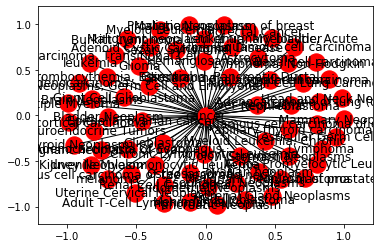

In [74]:
nx.draw_networkx(subs_graphs[0])
plt.show()

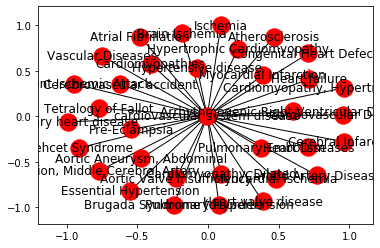

In [75]:
nx.draw_networkx(subs_graphs[1])
plt.show()

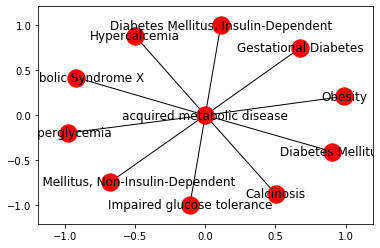

In [76]:
nx.draw_networkx(subs_graphs[2])
plt.show()

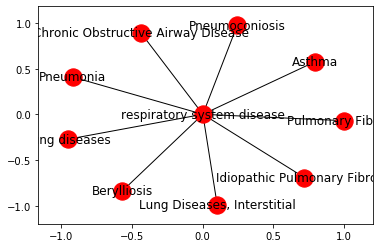

In [77]:
nx.draw_networkx(subs_graphs[3])
plt.show()

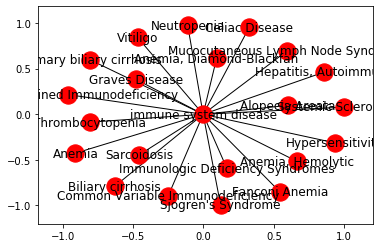

In [78]:
nx.draw_networkx(subs_graphs[4])
plt.show()

## Analysis

I decided to take a look at degree centrality and page rank to get an idea which disease classes have the most nodes. This can be useful for medical professionals to determine disease risk factors and adjacency.

In [25]:
# Find number of nodes for each connected graph
[len(g) for g in Gcc] # the first and largest is most important

[69,
 34,
 11,
 10,
 22,
 9,
 2,
 12,
 3,
 17,
 3,
 2,
 45,
 2,
 11,
 17,
 8,
 13,
 3,
 5,
 2,
 7,
 3,
 3,
 2,
 5,
 3,
 3,
 2,
 2]

In [26]:
# Show all of the connected components
sorted(nx.connected_components(graph))

[{'Acute Promyelocytic Leukemia',
  'Adenocarcinoma',
  'Adenocarcinoma Of Esophagus',
  'Adenocarcinoma of lung (disorder)',
  'Adenoid Cystic Carcinoma',
  'Adrenal Gland Neoplasms',
  'Adrenocortical carcinoma',
  'Adult T-Cell Lymphoma/Leukemia',
  'Astrocytoma',
  'Basal cell carcinoma',
  'Bladder Neoplasm',
  'Brain Neoplasms',
  'Burkitt Lymphoma',
  'Carcinoma, Pancreatic Ductal',
  'Carcinoma, Transitional Cell',
  'Cholangiocarcinoma',
  'Chronic Lymphocytic Leukemia',
  'Colon Carcinoma',
  'Colorectal Cancer',
  'Endometrial Neoplasms',
  'Epithelial ovarian cancer',
  'Esophageal Neoplasms',
  'Giant Cell Glioblastoma',
  'Glioblastoma',
  'Glioma',
  'Head and Neck Neoplasms',
  'Hemangiosarcoma',
  'Hodgkin Disease',
  'Juvenile Myelomonocytic Leukemia',
  'Kidney Neoplasm',
  'Leukemia, Myelocytic, Acute',
  'Liver neoplasms',
  'Lymphoma',
  'Lymphoma, Non-Hodgkin',
  'Malignant neoplasm of breast',
  'Malignant neoplasm of ovary',
  'Malignant neoplasm of prostate',


In [9]:
# Degree centrality (valency) of a node of a graph:
# the fraction of nodes a node v is connected to
nx.degree(graph)

DegreeView({'Liver neoplasms': 1, 'cancer': 68, 'Congenital Heart Defects': 1, 'cardiovascular system disease': 33, 'Myocardial Infarction': 1, 'Obesity': 1, 'acquired metabolic disease': 10, 'Berylliosis': 1, 'respiratory system disease': 9, 'Sarcoidosis': 1, 'immune system disease': 21, 'Psoriasis': 1, 'integumentary system disease': 8, 'Narcolepsy': 1, 'sleep disorder': 1, 'Hypercalcemia': 1, 'Hemangiosarcoma': 1, 'Medulloblastoma': 1, 'Nephrotic Syndrome': 1, 'urinary system disease': 11, 'Cleft Lip': 1, 'orofacial cleft': 2, 'Cleft Palate': 1, 'Carcinoma, Pancreatic Ductal': 1, 'Nephrosis': 1, 'Mouth Diseases': 1, 'gastrointestinal system disease': 16, 'Infarction, Middle Cerebral Artery': 1, 'Hypertensive disease': 1, 'Substance-Related Disorders': 1, 'substance-related disorder': 2, 'Polycystic Ovary Syndrome': 1, 'polycystic ovary syndrome': 1, 'Diabetic Neuropathies': 1, 'nervous system disease': 44, 'Anemia, Hemolytic': 1, 'Leprosy': 1, 'bacterial infectious disease': 1, 'Mar

In [10]:
deg_centrality = nx.degree_centrality(graph) 
 
print(deg_centrality) 

{'Liver neoplasms': 0.00303951367781155, 'cancer': 0.2066869300911854, 'Congenital Heart Defects': 0.00303951367781155, 'cardiovascular system disease': 0.10030395136778116, 'Myocardial Infarction': 0.00303951367781155, 'Obesity': 0.00303951367781155, 'acquired metabolic disease': 0.030395136778115502, 'Berylliosis': 0.00303951367781155, 'respiratory system disease': 0.02735562310030395, 'Sarcoidosis': 0.00303951367781155, 'immune system disease': 0.06382978723404255, 'Psoriasis': 0.00303951367781155, 'integumentary system disease': 0.0243161094224924, 'Narcolepsy': 0.00303951367781155, 'sleep disorder': 0.00303951367781155, 'Hypercalcemia': 0.00303951367781155, 'Hemangiosarcoma': 0.00303951367781155, 'Medulloblastoma': 0.00303951367781155, 'Nephrotic Syndrome': 0.00303951367781155, 'urinary system disease': 0.03343465045592705, 'Cleft Lip': 0.00303951367781155, 'orofacial cleft': 0.0060790273556231, 'Cleft Palate': 0.00303951367781155, 'Carcinoma, Pancreatic Ductal': 0.003039513677811

In [11]:
pr = nx.pagerank(graph, alpha = 0.8) 
  
print(pr) 

{'Liver neoplasms': 0.0017030871007236133, 'cancer': 0.09328098624170325, 'Congenital Heart Defects': 0.0017240968508526406, 'cardiovascular system disease': 0.04613510695216581, 'Myocardial Infarction': 0.0017240968508526406, 'Obesity': 0.0018179804200006392, 'acquired metabolic disease': 0.015153529133326956, 'Berylliosis': 0.0018329473658068411, 'respiratory system disease': 0.01380650401076873, 'Sarcoidosis': 0.0017474219611999706, 'immune system disease': 0.029970805481467314, 'Psoriasis': 0.001851656048064594, 'integumentary system disease': 0.012459478888210524, 'Narcolepsy': 0.0030303030303030303, 'sleep disorder': 0.0030303030303030303, 'Hypercalcemia': 0.0018179804200006392, 'Hemangiosarcoma': 0.0017030871007236133, 'Medulloblastoma': 0.0017030871007236133, 'Nephrotic Syndrome': 0.001805734737068292, 'urinary system disease': 0.016500554255885164, 'Cleft Lip': 0.002356790469023924, 'orofacial cleft': 0.004377328152861244, 'Cleft Palate': 0.002356790469023924, 'Carcinoma, Panc

## Visualization

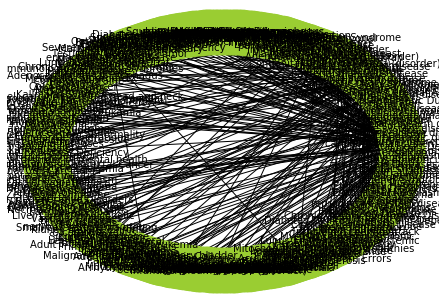

In [39]:
#Calculate the positions of the nodes, and pass to the draw function.
pos = nx.drawing.layout.circular_layout(graph)

nx.draw(graph, pos=pos, with_labels=True, font_size=10,
        node_color='yellowgreen', node_size=2000)

In [48]:
# Degree centrality (valency) of a node of a graph:
# the fraction of nodes a node v is connected to
nx.degree(graph)

DegreeView({'Liver neoplasms': 1, 'cancer': 68, 'Congenital Heart Defects': 1, 'cardiovascular system disease': 33, 'Myocardial Infarction': 1, 'Obesity': 1, 'acquired metabolic disease': 10, 'Berylliosis': 1, 'respiratory system disease': 9, 'Sarcoidosis': 1, 'immune system disease': 21, 'Psoriasis': 1, 'integumentary system disease': 8, 'Narcolepsy': 1, 'sleep disorder': 1, 'Hypercalcemia': 1, 'Hemangiosarcoma': 1, 'Medulloblastoma': 1, 'Nephrotic Syndrome': 1, 'urinary system disease': 11, 'Cleft Lip': 1, 'orofacial cleft': 2, 'Cleft Palate': 1, 'Carcinoma, Pancreatic Ductal': 1, 'Nephrosis': 1, 'Mouth Diseases': 1, 'gastrointestinal system disease': 16, 'Infarction, Middle Cerebral Artery': 1, 'Hypertensive disease': 1, 'Substance-Related Disorders': 1, 'substance-related disorder': 2, 'Polycystic Ovary Syndrome': 1, 'polycystic ovary syndrome': 1, 'Diabetic Neuropathies': 1, 'nervous system disease': 44, 'Anemia, Hemolytic': 1, 'Leprosy': 1, 'bacterial infectious disease': 1, 'Mar

## Conclusion

I set out to create a demonstration of how to make a network graph. While this graph and experiment did not yield any large analytical value, I wanted to explore this dataset. I found infinite path length because the is not strongly connected.
So we can calculate the diameter of our graph only if it is converted to an undirected graph. Our true, directed graph, does not have a diameter because our graph isn't strongly connected. Thus, some nodes are disconnected, making the diameter infinite. However, no nodes are isolated.